In [280]:
%load_ext autoreload
%autoreload 1

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import FileLink
import os
from IPython.display import clear_output, display

%aimport plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
use_dataset = True
selected_folder = 'Fishyscapes_LaF'
selected_file = '01_Hanns_Klemm_Str_45_000005_000230.png'
selected_model = 'grood_knn_e2e_cityscapes_500k_fl003_condensv5_randomcrop1344_hflip_nptest_lr0025wd54_ipdf0_ioodpdf0uni1_staticood1'
threshold = [0.8, 0.997]

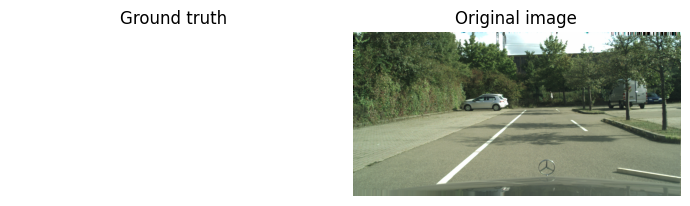

In [282]:
#Image preview
original_image, original_gt = plot.load_images(selected_file, use_dataset, selected_folder, selected_model)


fig, ax = plt.subplots(1, 2, figsize=(7, 3))  # 1 row, 2 columns, and adjust the figure size as needed

#mask_gray = cv.cvtColor(original_gt, cv.COLOR_BGR2GRAY)

# Display the mask
ax[0].imshow(original_gt)
ax[0].set_title('Ground truth')
ax[0].axis('off')  # Hide axes

# Display the image
ax[1].imshow(original_image)
ax[1].set_title('Original image')
ax[1].axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [283]:
output = widgets.Output()

def show_image(fig_size=(16, 12)):
    def process_images(use_dataset):
        original_image, original_gt = plot.load_images(selected_file, use_dataset, selected_folder, selected_model)
        contoured_image = plot.drawContours(original_image, original_gt, use_dataset, threshold)
        overlay_50 = plot.drawOverlay(0.5, original_image, original_gt, use_dataset, threshold)
        overlay_100 = plot.drawOverlay(1, original_image, original_gt, use_dataset, threshold)
        return np.concatenate((contoured_image, overlay_50, overlay_100), axis=1)
    
    first_row = process_images(True)
    second_row = process_images(False)

    combined_image = np.concatenate((first_row, second_row), axis=0)
    
    with output:
        clear_output(wait=True)
        plt.figure(figsize=fig_size)
        plt.imshow(combined_image)
        plt.axis('off')
        plt.title('Contours and Overlays')
        plt.show()

In [284]:
def on_folder_selected(change):
    global selected_folder
    selected_folder = change['new']
    #print(f"Selected folder: {change['new']}")
    # Update the image selector options based on the selected folder
    image_selector_widget.options = plot.get_all_files(f'data/export/datasets/{selected_folder}/test/imgs/')

In [285]:
def on_model_selected(change):
    global selected_model
    selected_model = change['new']
    #print(f"Selected model: {change['new']}")
    show_image()

In [286]:
def on_file_selected(change):
    global selected_file
    selected_file = change['new']
    #print(f"Selected file: {selected_file}")
    show_image()

In [287]:
def update_slider(change):
    threshold[0], threshold[1] = road_slider.value, obstacle_slider.value
    show_image()

BUG  
01_Hanns_Klemm_Str_45_000000_000230  
wrong ground truth

In [288]:
road_slider = widgets.FloatSlider(value=threshold[0], min=0.4, max=0.9995, step=0.0001, description='Road Threshold', readout_format='.4f',
                                  style={'description_width': 'initial'}, layout=widgets.Layout(width='500px'))
road_slider.observe(update_slider, names='value')

obstacle_slider = widgets.FloatSlider(value=threshold[1], min=0.95, max=1, step=0.0001, description='Obstacle Threshold', readout_format='.4f', 
                                      style={'description_width': 'initial'}, layout=widgets.Layout(width='500px'))
obstacle_slider.observe(update_slider, names='value')

folder_selector_widget = widgets.Dropdown(
    options=plot.get_all_folders('data/export/datasets/'),  # Call the folder-only function
    description='Choose folder',
    disabled=False,
    style={'description_width': 'initial'}, layout=widgets.Layout(width='500px')
)
folder_selector_widget.observe(on_folder_selected, names='value')

image_selector_widget = widgets.Dropdown(
    options=plot.get_all_files('data/export/datasets/' + selected_folder + '/test/imgs/'),
    description='Choose file',
    disabled=False,
    style={'description_width': 'initial'}, layout=widgets.Layout(width='500px')
)
image_selector_widget.observe(on_file_selected, names='value')

model_selector_widget = widgets.Dropdown(
    options=plot.get_all_folders('data/export/results/'),
    description='Choose model',
    disabled=False,
    style={'description_width': 'initial'}, layout=widgets.Layout(width='500px')
)
model_selector_widget.observe(on_model_selected, names='value')


display(folder_selector_widget, image_selector_widget, model_selector_widget, road_slider, obstacle_slider, output)
show_image()


Dropdown(description='Choose folder', layout=Layout(width='500px'), options=('RoadObstacles21', 'RoadAnomaly',…

Dropdown(description='Choose file', layout=Layout(width='500px'), options=('01_Hanns_Klemm_Str_45_000005_00023…

Dropdown(description='Choose model', layout=Layout(width='500px'), options=('grood_logml_1000K_01adamw_tau10_r…

FloatSlider(value=0.8, description='Road Threshold', layout=Layout(width='500px'), max=0.9995, min=0.4, readou…

FloatSlider(value=0.997, description='Obstacle Threshold', layout=Layout(width='500px'), max=1.0, min=0.95, re…

Output()